# Load data

This notebook will apply EOF analysis to regridded V20 SSH data via a Jupyter Notebook using ferretmagic.  Many thanks to Patrick Brockmann and the [ferretmagic documentation](https://github.com/PBrockmann/C-CASCADES_notebooks/blob/master/ferretBasics.ipynb) for providing an excellent starting point!  Also thanks to the Ferret Development Team for their [EOF example](https://ferret.pmel.noaa.gov/Ferret/documentation/ferret-eof-demo).  More details on the EOFSVD code are [here](https://ferret.pmel.noaa.gov/Ferret/documentation/users-guide/appendix-a-external-functions/EOF-SPACE#_eofsvd_space).  First we start ferretmagic and then load the data into PyFerret.

In [1]:
%load_ext ferretmagic

In [2]:
%%ferret

cancel data/all
!use /home/jovyan/data/1_mesh_mask.nc
!use /home/jovyan/data/V20_1948_2009_SSH.nc
!use coads_climatology
use V20_1958_2009_SSH_regridded.nc
set memory /size=2000
show data


currently SET data sets:
 1> ./V20_1958_2009_SSH_regridded.nc (default)
 name title I J K L
 TIME ... ... ... 1:3796
 (invalid coordinate axis)
 SSH 1:89 1:85 ... 1:3796
 GLAMT 1:89 1:85 ... ...
 GPHIT 1:89 1:85 ... ...

# Sample plot of data

! Enter_GO land
! Exit_GO


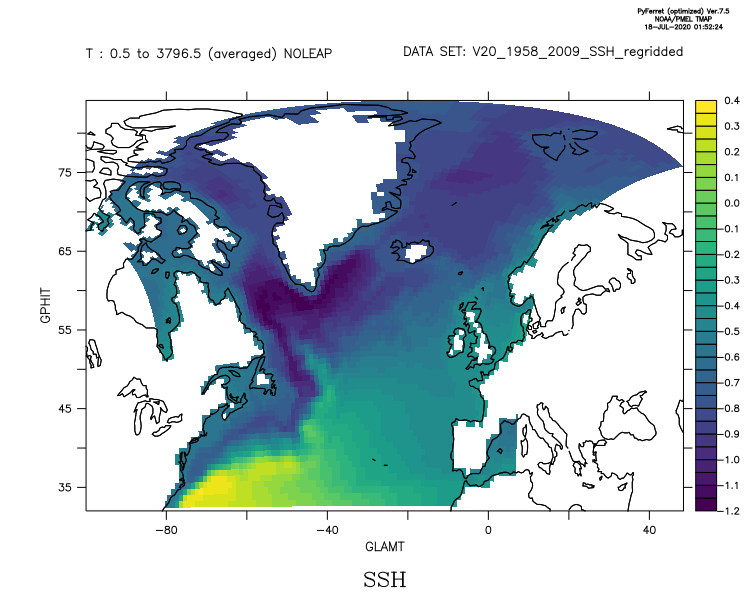

In [3]:
%%ferret
shade /i=2:2000 /j=2:2000 ssh[l=@AVE],glamt,gphit; go land

# Run EOF

In [4]:
%%ferret
let eof_time = eofsvd_tfunc(ssh[d=1])
save /clobber /file=eof_time.nc eof_time


In [4]:
%%ferret
let eof_space = eofsvd_space(ssh[d=1])
save /clobber /file=eof_space.nc eof_space


In [4]:
%%ferret
let eof_stat = eofsvd_stat(ssh[d=1])
save /clobber /file=eof_stat.nc eof_stat


In [5]:
%%ferret
use eof_time.nc
use eof_space.nc
use eof_stat.nc
sh d

currently SET data sets:
 1> ./V20_1958_2009_SSH_regridded.nc
 name title I J K L
 TIME ... ... ... 1:3796
 (invalid coordinate axis)
 SSH 1:89 1:85 ... 1:3796
 GLAMT 1:89 1:85 ... ...
 GPHIT 1:89 1:85 ... ...
 
 2> ./eof_time.nc
 name title I J K L
 TIME ... ... ... 1:3796
 (invalid coordinate axis)
 EOF_TIME EOFSVD_TFUNC(SSH[D=1]) 1:7565 ... ... 1:3796
 
 3> ./eof_space.nc
 name title I J K L
 EOF_SPACE
 EOFSVD_SPACE(SSH[D=1]) 1:89 1:85 ... 1:7565
 
 4> ./eof_stat.nc (default)
 name title I J K L
 EOF_STAT EOFSVD_STAT(SSH[D=1]) 1:7565 1:3 ... ...

In [22]:
%%ferret
man eofsvd_stat


yes? man eofsvd_stat
**ERROR: unknown command: man